# K Nearest Neighbours

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00
time: 292 µs (started: 2023-11-27 08:41:57 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 31.4 s (started: 2023-11-27 08:41:57 +00:00)


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/CSE_4554_ML_PROJECT/training_set.csv')
df_val=pd.read_csv('/content/drive/MyDrive/CSE_4554_ML_PROJECT/validation_set.csv')

time: 31.1 s (started: 2023-11-27 08:42:28 +00:00)


In [ ]:
X_train = df_train.drop(['Bug Present','filename','Unnamed: 0'], axis=1)
y_train = df_train['Bug Present']
X_val = df_val.drop(['Bug Present','filename'], axis=1)
y_val = df_val['Bug Present']

time: 240 ms (started: 2023-11-27 08:42:59 +00:00)


In [ ]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

time: 1.47 s (started: 2023-11-27 08:43:00 +00:00)


In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

time: 652 µs (started: 2023-11-27 08:43:01 +00:00)


In [ ]:
cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

time: 2h 24min 31s (started: 2023-11-27 08:43:24 +00:00)


In [ ]:
val_accuracy = model.score(X_val, y_val)

In [ ]:
print("Cross-validation results:", cross_val_results)
print("Mean Cross-validation accuracy: {:.2f}%".format(cross_val_results.mean() * 100))
print("Validation accuracy: {:.2f}%".format(val_accuracy * 100))

# Performance Metrics

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/CSE_4554_ML_PROJECT/testing_set.csv')

time: 518 ms (started: 2023-11-27 08:43:01 +00:00)


In [ ]:
X_test= df_test.drop(['Bug Present','filename'], axis=1)
y_test = df_test['Bug Present']

time: 7.42 ms (started: 2023-11-27 08:43:02 +00:00)


In [ ]:
y_pred=model.predict(X_test)

time: 570 ms (started: 2023-11-27 08:43:02 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score

time: 539 µs (started: 2023-11-27 08:43:02 +00:00)


In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy*100,"%")

Accuracy:  35.714285714285715 %
time: 2.79 ms (started: 2023-11-27 08:43:02 +00:00)


In [ ]:
from sklearn.metrics import roc_curve,auc

time: 1.94 ms (started: 2023-11-27 08:43:02 +00:00)


In [ ]:
fpr,tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

time: 9.03 ms (started: 2023-11-27 08:43:02 +00:00)


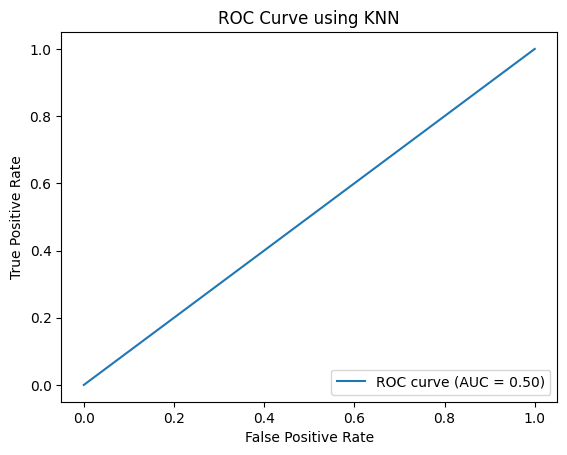

time: 774 ms (started: 2023-11-27 08:43:02 +00:00)


In [ ]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

time: 509 ms (started: 2023-11-27 08:43:03 +00:00)


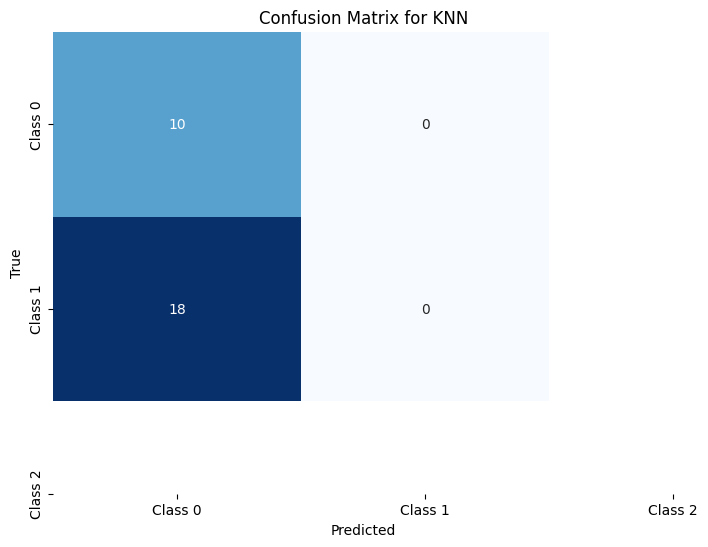

time: 280 ms (started: 2023-11-27 08:43:04 +00:00)


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')

plt.show()